# Reading your data

In [9]:
import pandas as pd
import numpy as np
data = pd.read_csv("/home/alinemati/Yandex.Disk/Nirvana/database/flipkart_data.csv")
data.shape

(266242, 6)

In [10]:
data.head(3)

product_description  \
0                                                NaN   
1                                                NaN   
2  A revolutionary camera that adapts like the hu...   

                                    meta_description  \
0  Buy Moto G5s (Lunar Gray, 32 GB) online at bes...   
1  Buy Imported ShengShow Gold Mirror Rubik Magic...   
2  Buy Samsung Galaxy S9 (Midnight Black, 128 GB)...   

                                         description  \
0                                                NaN   
1  Very Good Fantastic Product. No compromise on ...   
2  Galaxy S9 Sleek and stunning the latest flagsh...   

                                         bread_crumb highlights  \
0  Home > Mobiles & Accessories > Mobiles > Motor...         []   
1  Home > Toys > Puzzles & Board Games > Puzzles ...         []   
2  Home > Mobiles & Accessories > Mobiles > Samsu...         []   

                                    formated_reviews  
0  ['Nice Good but over priced', 'Absolute rubbis...  
1  ['Really Nice Smooth', 'Excellent It is a good...  
2  ['Must buy! Just woww', 'Fakruddin Nice Produc...

In [12]:
# Replacing NANs with empty string, which will help us to identify outliers
# Once we identify outliers and remove them then we will deal with empty strings/missing data
data = data.replace(np.NAN,'')

In [13]:
data.head(2)

product_description                                   meta_description  \
0                      Buy Moto G5s (Lunar Gray, 32 GB) online at bes...   
1                      Buy Imported ShengShow Gold Mirror Rubik Magic...   

                                         description  \
0                                                      
1  Very Good Fantastic Product. No compromise on ...   

                                         bread_crumb highlights  \
0  Home > Mobiles & Accessories > Mobiles > Motor...         []   
1  Home > Toys > Puzzles & Board Games > Puzzles ...         []   

                                    formated_reviews  
0  ['Nice Good but over priced', 'Absolute rubbis...  
1  ['Really Nice Smooth', 'Excellent It is a good...

#Steps need to be followed
#1. Use flipkart data and develop a NMF noun model to identify attributes.

In [14]:
# data frame looks like this
all_reviews = list(data.iloc[:]['formated_reviews'])
all_reviews

['[\'Nice Good but over priced\', \'Absolute rubbish! Very bed experience\', "Mind-blowing purchase yes it is true it has heating issues but it heats when u charge it or u use it where u do not get ventilation as i realized specially outdoors but i would like to give 5/5 for camera performance and it\'s processor and i think this phone is best in this budget so i would like to suggest if u have around 10k then it will be a good pick", \'Wonderful nice\', \'Fair touch of this phone is not so good,\', \'Great product Nice\', \'Brilliant good\', \'Nice mobile is good but battery back up is not good enough for running  whole day..\', \'Really Nice Great quality product and nice packing.\', \'Perfect product! very nice\', \'Nice product Good phone in this price range\', \'Could be way better not too good\', \'Good Poor battery performance.No inbuilt gallery.Not worth.\', \'Highly recommended awesome product by Moto.... brilliant colour, hd display, good sound quality. Some people were compl

['[\'Nice Good but over priced\', \'Absolute rubbish! Very bed experience\', "Mind-blowing purchase yes it is true it has heating issues but it heats when u charge it or u use it where u do not get ventilation as i realized specially outdoors but i would like to give 5/5 for camera performance and it\'s processor and i think this phone is best in this budget so i would like to suggest if u have around 10k then it will be a good pick", \'Wonderful nice\', \'Fair touch of this phone is not so good,\', \'Great product Nice\', \'Brilliant good\', \'Nice mobile is good but battery back up is not good enough for running  whole day..\', \'Really Nice Great quality product and nice packing.\', \'Perfect product! very nice\', \'Nice product Good phone in this price range\', \'Could be way better not too good\', \'Good Poor battery performance.No inbuilt gallery.Not worth.\', \'Highly recommended awesome product by Moto.... brilliant colour, hd display, good sound quality. Some people were compl

# Removing outliers

In [16]:

import numpy as np
# Replacing NANs with empty string, which will help us to identify outliers
# Once we identify outliers and remove them then we will deal with empty strings/missing data
data = data.replace(np.NAN,'')
data.head(2)

0    ['Nice Good but over priced', 'Absolute rubbis...
1    ['Really Nice Smooth', 'Excellent It is a good...
Name: formated_reviews, dtype: object

# Dealing outlier in 'formated_reviews' column

In [17]:
# Let's take all reviews in a list
all_reviews = list(data.iloc[:])
all_reviews

['[\'Nice Good but over priced\', \'Absolute rubbish! Very bed experience\', "Mind-blowing purchase yes it is true it has heating issues but it heats when u charge it or u use it where u do not get ventilation as i realized specially outdoors but i would like to give 5/5 for camera performance and it\'s processor and i think this phone is best in this budget so i would like to suggest if u have around 10k then it will be a good pick", \'Wonderful nice\', \'Fair touch of this phone is not so good,\', \'Great product Nice\', \'Brilliant good\', \'Nice mobile is good but battery back up is not good enough for running  whole day..\', \'Really Nice Great quality product and nice packing.\', \'Perfect product! very nice\', \'Nice product Good phone in this price range\', \'Could be way better not too good\', \'Good Poor battery performance.No inbuilt gallery.Not worth.\', \'Highly recommended awesome product by Moto.... brilliant colour, hd display, good sound quality. Some people were compl

In [18]:
type(all_reviews)

list

In [13]:
# 'all_reviews' is list of list --> we need to convert it to a single list
all_reviews = [item for sublist in all_reviews for item in sublist]
all_reviews

['[',
 "'",
 'N',
 'i',
 'c',
 'e',
 ' ',
 'G',
 'o',
 'o',
 'd',
 ' ',
 'b',
 'u',
 't',
 ' ',
 'o',
 'v',
 'e',
 'r',
 ' ',
 'p',
 'r',
 'i',
 'c',
 'e',
 'd',
 "'",
 ',',
 ' ',
 "'",
 'A',
 'b',
 's',
 'o',
 'l',
 'u',
 't',
 'e',
 ' ',
 'r',
 'u',
 'b',
 'b',
 'i',
 's',
 'h',
 '!',
 ' ',
 'V',
 'e',
 'r',
 'y',
 ' ',
 'b',
 'e',
 'd',
 ' ',
 'e',
 'x',
 'p',
 'e',
 'r',
 'i',
 'e',
 'n',
 'c',
 'e',
 "'",
 ',',
 ' ',
 '"',
 'M',
 'i',
 'n',
 'd',
 '-',
 'b',
 'l',
 'o',
 'w',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'u',
 'r',
 'c',
 'h',
 'a',
 's',
 'e',
 ' ',
 'y',
 'e',
 's',
 ' ',
 'i',
 't',
 ' ',
 'i',
 's',
 ' ',
 't',
 'r',
 'u',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'h',
 'e',
 'a',
 't',
 'i',
 'n',
 'g',
 ' ',
 'i',
 's',
 's',
 'u',
 'e',
 's',
 ' ',
 'b',
 'u',
 't',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'e',
 'a',
 't',
 's',
 ' ',
 'w',
 'h',
 'e',
 'n',
 ' ',
 'u',
 ' ',
 'c',
 'h',
 'a',
 'r',
 'g',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'o',
 'r',
 ' ',
 'u',
 ' ',
 'u'

In [12]:
all_reviews

['[',
 "'",
 'N',
 'i',
 'c',
 'e',
 ' ',
 'G',
 'o',
 'o',
 'd',
 ' ',
 'b',
 'u',
 't',
 ' ',
 'o',
 'v',
 'e',
 'r',
 ' ',
 'p',
 'r',
 'i',
 'c',
 'e',
 'd',
 "'",
 ',',
 ' ',
 "'",
 'A',
 'b',
 's',
 'o',
 'l',
 'u',
 't',
 'e',
 ' ',
 'r',
 'u',
 'b',
 'b',
 'i',
 's',
 'h',
 '!',
 ' ',
 'V',
 'e',
 'r',
 'y',
 ' ',
 'b',
 'e',
 'd',
 ' ',
 'e',
 'x',
 'p',
 'e',
 'r',
 'i',
 'e',
 'n',
 'c',
 'e',
 "'",
 ',',
 ' ',
 '"',
 'M',
 'i',
 'n',
 'd',
 '-',
 'b',
 'l',
 'o',
 'w',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'u',
 'r',
 'c',
 'h',
 'a',
 's',
 'e',
 ' ',
 'y',
 'e',
 's',
 ' ',
 'i',
 't',
 ' ',
 'i',
 's',
 ' ',
 't',
 'r',
 'u',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'h',
 'e',
 'a',
 't',
 'i',
 'n',
 'g',
 ' ',
 'i',
 's',
 's',
 'u',
 'e',
 's',
 ' ',
 'b',
 'u',
 't',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'e',
 'a',
 't',
 's',
 ' ',
 'w',
 'h',
 'e',
 'n',
 ' ',
 'u',
 ' ',
 'c',
 'h',
 'a',
 'r',
 'g',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'o',
 'r',
 ' ',
 'u',
 ' ',
 'u'

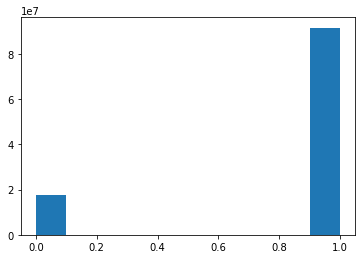

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
lens_of_reviews = [len(x.split()) for x in all_reviews]
plt.hist(lens_of_reviews)
plt.show()

In [ ]:
plt.hist(lens_of_reviews, range=(5,80))
plt.show()

In [ ]:
# removing outliers from reviews >=5 and <80
data['formated_reviews'] = data['formated_reviews'].apply(lambda x: [rev for rev in x if (len(rev.split())>5) | (len(rev.split())<80)])

In [ ]:
data.head(2)

# Dealing outliers in meta_description and description

#2. Using this NMF model find the attributes for all the reviews present in the training dataset. Note: Find attributes only for "formatted_review" column of training dataset.


#3. Attributes identified by NMF should be tagged as "ATTR" and other words should be tagged as "NAATTR".


In [ ]:
#4. Using this labelled dataset train a RNN.
